# Question 1

Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import copy

## Visualising the Image Data

In [2]:
data = pd.read_csv('hw2-image.txt', sep=" ", header=None)
data

,0,1,2
0,129,108,61
1,117,96,51
2,102,77,36
3,94,64,26
4,97,59,22
5,107,59,23
6,115,59,22
7,119,59,22
8,119,60,18
9,119,60,18


In [3]:
x = np.array(data, dtype='float64')

## K-Means Algorithm

1.  Initialize centroids   z(1), . . . , z(k)


2.  Repeat until there is no further change in cost
    
    
    (a)  For each j= 1, . . . , k:Cj={is.t.x(i)is closest toz(j)}
    (b)  For eachj= 1, . . . , k:z(j)=1|Cj|∑i∈Cjx(i)(cluster mean)

## Initialise the centroids as given in the Question

In [4]:
initial_centroids = [[255,255, 255],[255,0,0],[128,0,0],[0,255,0],[0,128,0],[0,0,255],[0,0,128],[0,0,0]]
initial_centroids = np.array(initial_centroids, dtype='float64')
pd.DataFrame(initial_centroids)

,0,1,2
0,255.0,255.0,255.0
1,255.0,0.0,0.0
2,128.0,0.0,0.0
3,0.0,255.0,0.0
4,0.0,128.0,0.0
5,0.0,0.0,255.0
6,0.0,0.0,128.0
7,0.0,0.0,0.0


## Function for Eucledian Distance

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

## Finding the Cluster (Not the Most Efficient and Effective but it works)

In [6]:
def getCluster(x, z):
    distance, cluster, result, new_centroid, nresult = [], [], {new_list: [] for new_list in range(len(z))} , {new_list: [] for new_list in range(len(z))}, []
    data_points = np.array(x,dtype='float64')
    z = np.array(z, dtype='float64')
    for i in data_points:
        distance.append(dist(i,z)) #distance for each data point to cluster centroids stored in array ([d_tocluster1, d_tocluster2,...])
    distance = np.array(distance,dtype='float64')
    for j in distance:
        mini = np.min(j)
        index = np.where(j==mini)
        cluster.append([index[0][0],mini])
        
    for i in range(len(cluster)):
        cluster_grp = cluster[i][0]
        nresult.append([cluster[i][0],data_points[i]])
        result[cluster_grp].append(data_points[i])
    for i in result:
        result[i] = np.array(result[i], dtype='float64')
        try:
            npmean = np.mean(result[i], axis = 0)
            new_centroid[i].append(npmean)
            new_centroid[i] = new_centroid[i][0]
        except: 
            new_centroid[i] = []
    new_centroid = pd.DataFrame.from_dict(new_centroid)
    new_centroid = new_centroid.dropna(axis = 'columns')
    return (new_centroid.transpose(), result, nresult)

## Function to Compute Cost

In [7]:
def costSVM(centroids, result):
    z = pd.DataFrame.to_dict(centroids.T)
    x,y = 0, 0
    for i in z:
        z[i] = np.array([z[i][0], z[i][1], z[i][2]], dtype = 'float64')
    for i in z:
        x = dist(z[i], result[i])
        x = np.sum(x)
        y+= x
    return y

## K-Means Function

In [8]:
def K_Means(x, centroids):
    data_points = np.array(x,dtype='float64')
    z = np.array(centroids, dtype='float64')
    
    centroid = copy.deepcopy(z)
    #While true, compute cost and so long as cost is not the same as the prev
    centroid, result, ncluster_grp = getCluster(data_points, centroid)
    errorList = [costSVM(centroid,result)]
    centroid, result, ncluster_grp = getCluster(data_points, centroid)
    errorList.append(costSVM(centroid,result))
    
    while True:
        centroid, result, ncluster_grp = getCluster(data_points, centroid)
        errorList.append(costSVM(centroid,result))
        if errorList[len(errorList)-2] == errorList[len(errorList)-1]:
            break
    return errorList, centroid, result, ncluster_grp

In [9]:
error, new_centroids, result, ncluster_grp = K_Means(x, initial_centroids)

C:\Users\Asus\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Asus\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## List of all the Centroids: In the end there are 6 clusters since 2 cannot be considered and the final clusters

In [10]:
new_centroids

,0,1,2
0,241.229615,238.625152,233.862880
1,194.411587,136.333114,90.943647
2,136.265556,61.089731,10.103855
3,157.291733,97.593975,51.433296
4,78.927437,37.108287,13.070705
5,25.978002,23.235754,23.605991


## Training Error for K-Means Clustering and the plot

In [11]:
error

[6849626.994077693,
 5428852.420420525,
 5253129.122097301,
 4954526.86497974,
 4470439.959182494,
 4389090.243573172,
 4386899.110875333,
 4389013.724993991,
 4392154.55083562,
 4393413.5741803255,
 4394239.549556059,
 4395580.688957701,
 4395561.344070264,
 4395437.333617357,
 4395446.658795097,
 4395407.167632084,
 4395082.623314356,
 4394248.374531303,
 4393217.474379174,
 4391087.7776281815,
 4387797.04048376,
 4380730.655901118,
 4365049.038153866,
 4316751.645374332,
 4238330.567343465,
 4192249.710367201,
 4164832.588026598,
 4147586.6301558767,
 4139289.448156015,
 4136435.847490309,
 4136079.6662893696,
 4135580.0499912617,
 4136044.206531724,
 4135528.7553891772,
 4135221.277475971,
 4134708.9183741,
 4134669.553386419,
 4134825.346624178,
 4134931.3754431596,
 4135030.085534461,
 4135105.498981531,
 4135148.1936253086,
 4135167.5849645277,
 4135189.0216652015,
 4135182.284614821,
 4135174.1787156947,
 4135181.766520245,
 4135181.766520245]

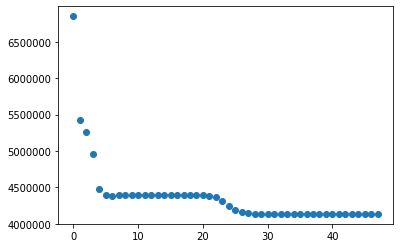

In [12]:
plt.scatter([f for f in range(len(error))], error)
plt.show()

## Converted Clusters: List of all the points in each cluster saved as a dictionary

In [13]:
result

{0: array([[249., 237., 239.],
        [218., 196., 183.],
        [215., 192., 176.],
        ...,
        [217., 222., 218.],
        [193., 191., 178.],
        [200., 196., 185.]]), 1: array([[153., 132.,  79.],
        [155., 132.,  80.],
        [155., 132.,  80.],
        ...,
        [151., 147., 136.],
        [154., 148., 148.],
        [153., 147., 147.]]), 2: array([[102.,  77.,  36.],
        [107.,  59.,  23.],
        [115.,  59.,  22.],
        ...,
        [143.,  66.,  14.],
        [132.,  54.,   6.],
        [112.,  40.,   2.]]), 3: array([[129., 108.,  61.],
        [117.,  96.,  51.],
        [129., 108.,  61.],
        ...,
        [ 89.,  88.,  83.],
        [110., 111., 106.],
        [101., 103., 100.]]), 4: array([[ 94.,  64.,  26.],
        [ 97.,  59.,  22.],
        [105.,  49.,  14.],
        ...,
        [ 81.,  36.,   7.],
        [ 71.,  31.,   6.],
        [ 66.,  31.,  11.]]), 5: array([[51., 24.,  5.],
        [51., 24.,  7.],
        [51., 24.,  7.

## Image preparation

In [14]:
new_centroids = np.array(new_centroids)

In [15]:
ncluster_grp = np.array(ncluster_grp)

In [16]:
ncluster_grp

array([[3, array([129., 108.,  61.])],
       [3, array([117.,  96.,  51.])],
       [2, array([102.,  77.,  36.])],
       ...,
       [4, array([81., 36.,  7.])],
       [4, array([71., 31.,  6.])],
       [4, array([66., 31., 11.])]], dtype=object)

In [17]:
new_centroids = {new_list: new_centroids[new_list] for new_list in range(len(new_centroids))}
new_centroids

{0: array([241.2296146 , 238.62515213, 233.86288032]),
 1: array([194.41158657, 136.33311389,  90.94364714]),
 2: array([136.2655563 ,  61.08973066,  10.10385457]),
 3: array([157.29173273,  97.59397508,  51.43329558]),
 4: array([78.92743714, 37.10828688, 13.07070482]),
 5: array([25.97800232, 23.23575423, 23.60599063])}

## Show Image

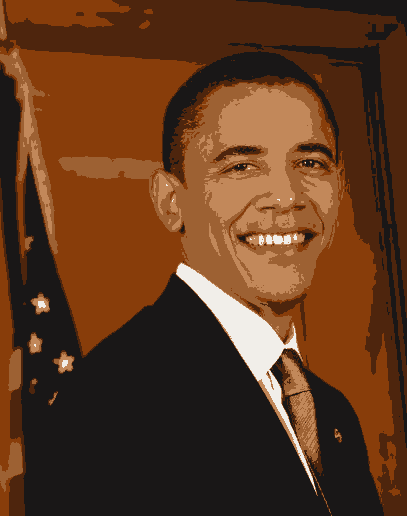

In [18]:
from PIL import Image
new_img = []
for i in range(len(ncluster_grp)):
    key = ncluster_grp[i][0]
    new_img.append(new_centroids[key])
new_img = np.array(new_img, dtype= 'uint8').reshape(516,407,3)
Image.fromarray(new_img)

## Question 2

### Image A: Manhattan Method

### Image B: Euclidean distance

### Image C:  l∞distance method

## Question 3:

#### The Advantages of K-mediods over k-Means:

 - K-Medoid Method is more flexible in terms of use. This is because There are more cases of k-Means not converging as must only be used with distances that are consistent with the mean
 - K-Medoid Method is more robust to noises and outliers

#### The Disadvantage of K-Medoids over k-Means:

 - K-Medoids are computationally more expensive than k-Means (K-Medoids complexity is O(i*k*(n-k)^2), where i is the total number of iterations,k is total number of clusters, and n is the number of objects. whereas K-Means complexity is O(i*k*m*n), where I is the number of iterations required for convergence,m is the number of points, k is number of clusters.